In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import joblib
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
df = pd.read_csv('/content/New Diabetes Dataset.csv')
df.head()

,Age,BloodPressure,Glucose,BMI,Outcome
0,50,72,148,33.6,1
1,31,66,85,26.6,0
2,32,64,183,23.3,1
3,21,66,89,28.1,0
4,33,40,137,43.1,1


In [ ]:
rows , col =  df.shape
print(f"Number of Rows : {rows} \nNumber of Columns : {col}")
df.info()
df.isnull().sum()
df.describe()

Number of Rows : 768 
Number of Columns : 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            768 non-null    int64  
 1   BloodPressure  768 non-null    int64  
 2   Glucose        768 non-null    int64  
 3   BMI            768 non-null    float64
 4   Outcome        768 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 30.1 KB


,Age,BloodPressure,Glucose,BMI,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000
mean,33.240885,69.105469,120.894531,31.992578,0.348958
std,11.760232,19.355807,31.972618,7.884160,0.476951
min,21.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,62.000000,99.000000,27.300000,0.000000
50%,29.000000,72.000000,117.000000,32.000000,0.000000
75%,41.000000,80.000000,140.250000,36.600000,1.000000
max,81.000000,122.000000,199.000000,67.100000,1.000000


In [ ]:
numeric_columns = ['Glucose', 'BMI','BloodPressure','Age']

for column_name in numeric_columns:
    Q1 = np.percentile(df[column_name], 25, interpolation='midpoint')
    Q3 = np.percentile(df[column_name], 75, interpolation='midpoint')

    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    # Find outliers in the specified column
    outliers = df[(df[column_name] < low_lim) | (df[column_name] > up_lim)][column_name]

    # Replace outliers with the respective lower or upper limit
    df[column_name] = np.where(df[column_name] < low_lim, low_lim, df[column_name])
    df[column_name] = np.where(df[column_name] > up_lim, up_lim, df[column_name])

In [ ]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=250)
log_reg.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=250, solver='liblinear')

Accuracy: 76.54%
Accuracy: 78.35%


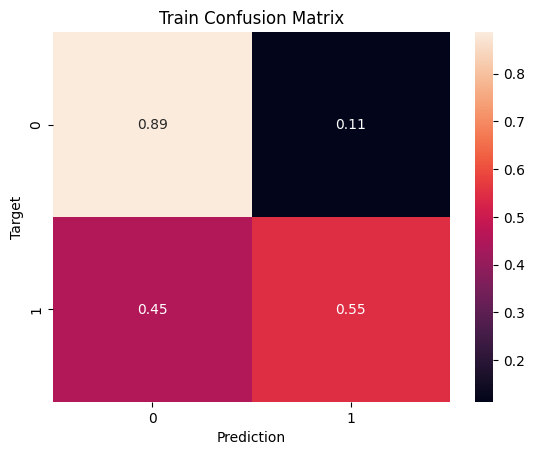

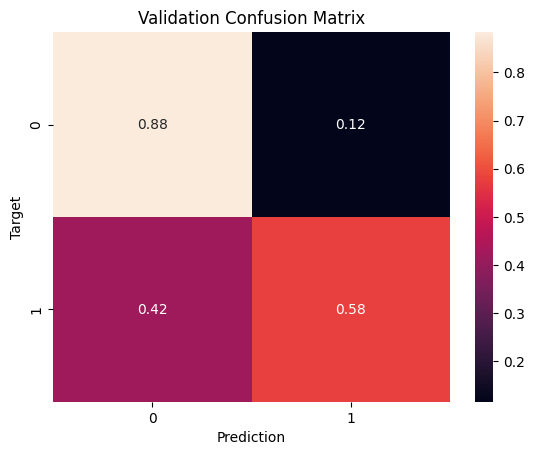

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))

    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))

    return preds

# Predict and plot on the training data
train_preds = predict_and_plot(log_reg, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(log_reg, X_test, y_test, 'Validation')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [ ]:
model_2.score(X_train,y_train)

1.0

Accuracy: 100.00%
Training Accuracy: 1.0
Validation Accuracy: 0.7142857142857143


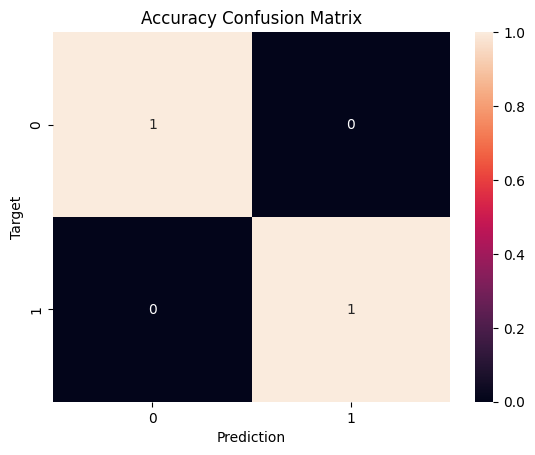

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decision_tree_model = DecisionTreeClassifier(random_state=42)

decision_tree_model.fit(X_train, y_train)

train_preds = decision_tree_model.predict(X_train)

train_accuracy = accuracy_score(y_train, train_preds)

train_accuracy_matrix = predict_and_plot(decision_tree_model, X_train, y_train, 'Accuracy')

val_preds = decision_tree_model.predict(X_test)

val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

In [ ]:
import joblib
joblib.dump(decision_tree_model, 'Diabetes prediction model.jolib')

['Diabetes prediction model.jolib']